<a href="https://colab.research.google.com/github/tothpaldavid/tothpaldavid.github.io/blob/main/MI_Projekt_Vegleges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cím, leírás

In [1]:
import pandas as pd

Adatok betöltése

In [2]:
df_2024 = pd.read_excel('2024.xlsx')
df_2022 = pd.read_csv('Copy of 2022.csv')
df_2023 = pd.read_csv('Copy of 2023.csv')

In [3]:
df_2022.head()

,Unnamed: 0,Zsákmány,WhatsOn,WeSithek,Weedrák,WaTtaFák,Verbunk,Vansör,Vá$örhely,UNI-GUNS,...,BorÁszok,Beez-Mute,Beerluck,BEER-ka,Basszhattyúk,Anyukád kedvenc csapata,Anti-biUnicum,amitakartok,A Kocka Másik Oldala,‘cuzGáz
0,Asztalitenisz,25,50,50,25,75,25,50,75,75,...,25,135,50,120,50,50,50,25,100,50
1,Beer-Pong,90,170,50,50,90,90,90,50,300,...,130,50,170,50,50,50,50,50,90,90
2,Bemutatkozó,128,120,75,225,208,42,213,25,342,...,90,290,350,127,25,188,112,242,54,49
3,Biliárd,20,30,30,100,20,20,50,30,20,...,40,40,20,20,0,20,80,30,40,30
4,Bogrács,106,85,90,93,98,101,0,116,145,...,94,104,92,102,0,69,81,122,109,102


2022 és 2023-as adat transzponálása és index hozzáadása 'Unnamed: 0' helyett

In [4]:
df_2022 = df_2022.set_index('Unnamed: 0').T.reset_index()
df_2023 = df_2023.set_index('Unnamed: 0').T.reset_index()

In [5]:
print(df_2024.columns.tolist())
print(df_2022.columns.tolist())
print(df_2023.columns.tolist())

['CSAPATNÉV', 'ÖSSZESEN', 'ASZTALITENISZ', 'BEER-PONG', 'BEMUTATKOZÓ', 'BILIÁRD', 'BOGRÁCS', 'BOLC', 'CHANDELIER', 'CHEST - PONG', 'CITY TOUR', 'COOLTÚRA', 'CSOCSÓ', 'DANCE BATTLE', 'EROTIK', 'FÉRFI FOCI', 'FOTÓMARATON', 'JENGA', 'KARAOKE', 'KÉZILABDA', 'KLÁN-TOUR', 'KLÁN-TOUR NIGHT', 'KOSÁRLABDA', 'KULTÚRMARATON', 'MÉTA', 'NÉPTÁNC', 'NŐI FOCI', 'PC:CS 2', 'PC:LOL', 'PÓKER', 'RÖPI', 'SAKK', 'SLAM', 'STAFÉTA', 'SZEMÉTSZEDÉS', 'TÁBLÉ', 'TÁNCMARATON', 'ÚSZÁS']
['index', 'Asztalitenisz', 'Beer-Pong', 'Bemutatkozó', 'Biliárd', 'Bogrács', 'Bolc', 'Chandelier', 'Chest-Pong', 'City Tour', 'Cooltúra', 'CS:GO', 'Csocsó', 'Dance Battle', 'Erotik', 'Férfi foci', 'Fotómaraton', 'Jenga', 'Karaoke', 'Kézilabda', 'Klán-Tour', 'Klán-Tour Night', 'Kosárlabda', 'Kultúrmaraton', 'LOL', 'Méta', 'Néptánc', 'Női foci', 'Póker', 'Röpi', 'Sakk', 'Slam', 'Staféta', 'Táblé', 'Táncmaraton', 'Úszás', 'Összesen']
['index', 'Asztalitenisz', 'Beer-Pong', 'Bemutatkozó', 'Biliárd', 'Bogrács', 'Bolc', 'Chandelier', 'Che

Mindegyik oszlopnév nagybetűsítése

In [6]:
# Csapatok és próbák - uppercase
df_2024.columns = [col.upper() for col in df_2024.columns]
df_2024 = df_2024.applymap(lambda x: x.upper() if type(x) == str else x)

df_2022.columns = [col.upper() for col in df_2022.columns]
df_2022 = df_2022.applymap(lambda x: x.upper() if type(x) == str else x)

df_2023.columns = [col.upper() for col in df_2023.columns]
df_2023 = df_2023.applymap(lambda x: x.upper() if type(x) == str else x)

In [7]:
df_2022.rename(columns={'INDEX': 'CSAPATNÉV'}, inplace=True)
df_2023.rename(columns={'INDEX': 'CSAPATNÉV'}, inplace=True)

In [8]:
# df_2023['CSAPATNÉV'] = [csapat.upper() for csapat in df_2023['CSAPATNÉV']]
# df_2023['CSAPATNÉV'].str.upper()

In [9]:
df_2022.head(2)

,CSAPATNÉV,ASZTALITENISZ,BEER-PONG,BEMUTATKOZÓ,BILIÁRD,BOGRÁCS,BOLC,CHANDELIER,CHEST-PONG,CITY TOUR,...,NŐI FOCI,PÓKER,RÖPI,SAKK,SLAM,STAFÉTA,TÁBLÉ,TÁNCMARATON,ÚSZÁS,ÖSSZESEN
0,ZSÁKMÁNY,25,90,128,20,106,155,60,50,247,...,50,25,50,40,177,122,30,342,102,3644
1,WHATSON,50,170,120,30,85,46,70,90,147,...,50,30,70,40,145,58,50,171,72,3180


Csapatnevek hasonló formára való hozása

In [10]:
df_2024['CSAPATNÉV'] = df_2024['CSAPATNÉV'].str.replace(r'^\d+\.\s*', '', regex=True)

In [11]:
print(df_2022['CSAPATNÉV'].tolist())
print(df_2023['CSAPATNÉV'].tolist())
print(df_2024['CSAPATNÉV'].tolist())

['ZSÁKMÁNY', 'WHATSON', 'WESITHEK', 'WEEDRÁK', 'WATTAFÁK', 'VERBUNK', 'VANSÖR', 'VÁ$ÖRHELY', 'UNI-GUNS', 'Ű-BEER', 'SZŰRT', 'SZESZKIMÓK', 'SZESZESÚJVÁR', 'SZESCOBAR', 'SZERVEZTEM', 'SÖRÖS-TERV', 'SHAKESBEER', "S'TUDJA", 'ROXTARROK', 'RÁMSZESZ', 'QUASALO', 'POPÓLOPÓK', 'MURATÚRA', 'MOZGÉKONYAK', 'ME OF US ONE', 'MAGYAR SZISZTEM', 'KÓMA-SZUTRA', 'K.O.SER', 'JAZZEMEG', 'IN-TEAM', 'IGNORE', 'GENITÁLIA', 'FUCKTÚRA', 'FEHÉRLÓPIA', "DRUNKIN' DONUTS", 'DIAKNAPOS CSAPAT', 'DEVASTATION', 'CUM WITH US', 'CHEEKY-SHARE', 'CHEEKLOW', 'BÚVÁRMEDVÉK', 'BORÁSZOK', 'BEEZ-MUTE', 'BEERLUCK', 'BEER-KA', 'BASSZHATTYÚK', 'ANYUKÁD KEDVENC CSAPATA', 'ANTI-BIUNICUM', 'AMITAKARTOK', 'A KOCKA MÁSIK OLDALA', '‘CUZGÁZ']
['KOMA-SZUTRA', 'GENITÁLIA', 'FUCKTÚRA', 'BEEZ-MUTE', 'VÁ$ÖRHELY', 'SHAKESBEER', 'UNI-GUNS', 'MOZGÉKONYAK', 'CUM WITH US', 'SZESZKIMÓK', 'BEERLUCK', 'BÚVÁRMEDVÉK', 'CHEEKLOW', 'SÖRNYETEGEK', 'ZSÁKMÁNY', 'SZERVEZTEM', 'ME OF US ONE', 'MAGYAR SZISZTEM', 'A KOCKA MÁSIK OLDALA', 'IN-TEAM', 'SZESZESÚJVÁR'

Oszlopok (események) neveinek leellenőréze.

In [12]:
columns_2024 = df_2024.columns.tolist()
columns_2022 = df_2022.columns.tolist()
columns_2023 = df_2023.columns.tolist()

matching_columns = set(columns_2024).intersection(columns_2022).intersection(columns_2023)
#Találó oszlopok ellenőrzése
#matching_columns = list(matching_columns)
#matching_columns

non_matching_columns_2024 = set(columns_2024) - set(matching_columns)
non_matching_columns_2022 = set(columns_2022) - set(matching_columns)
non_matching_columns_2023 = set(columns_2023) - set(matching_columns)

non_matching_columns = {
    '2024': list(non_matching_columns_2024),
    '2022': list(non_matching_columns_2022),
    '2023': list(non_matching_columns_2023)
}

non_matching_columns

{'2024': ['PC:CS 2', 'CHEST - PONG', 'SLAM', 'RÖPI', 'PC:LOL', 'SZEMÉTSZEDÉS'],
 '2022': ['CS:GO', 'LOL', 'RÖPI', 'SLAM', 'CHEST-PONG'],
 '2023': ['CS:GO', 'LOL', 'SLAM POETRY', 'RÖPLABDA', 'CHEST-PONG']}

Nevezési hibák javítása és esemény(ek) eltávolítása

In [13]:
df_2024.rename(columns={'PC:CS 2': 'CS:GO'}, inplace=True)
df_2024.rename(columns={'CHEST - PONG': 'CHEST-PONG'}, inplace=True)
df_2024.rename(columns={'PC:LOL': 'LOL'}, inplace=True)
df_2023.rename(columns={'RÖPLABDA': 'RÖPI'}, inplace=True)
df_2023.rename(columns={'SLAM POETRY': 'SLAM'}, inplace=True)

In [14]:
# Kivonom a szemétszedés oszlop összegét eltávolítás előtt
df_2024['ÖSSZESEN'] = df_2024['ÖSSZESEN'] - df_2024['SZEMÉTSZEDÉS']

# Mivel a szemétszedés minden csapatnak 100 pont lett és az előző években nincs benne, ezért ezt el lehet távolítani
df_2024.drop(columns=['SZEMÉTSZEDÉS'], inplace=True)

Ellenőrzés

In [15]:
columns_2024 = df_2024.columns.tolist()
columns_2022 = df_2022.columns.tolist()
columns_2023 = df_2023.columns.tolist()

matching_columns = set(columns_2024).intersection(columns_2022).intersection(columns_2023)

non_matching_columns_2024 = set(columns_2024) - set(matching_columns)
non_matching_columns_2022 = set(columns_2022) - set(matching_columns)
non_matching_columns_2023 = set(columns_2023) - set(matching_columns)

non_matching_columns = {
    '2024': list(non_matching_columns_2024),
    '2022': list(non_matching_columns_2022),
    '2023': list(non_matching_columns_2023)
}

non_matching_columns

{'2024': [], '2022': [], '2023': []}

Csapatnevek különbségei a 3 év alatt. Az itt található hibák manuláisan lettek javítva.

In [16]:
teams_2024 = set(df_2024['CSAPATNÉV'])
teams_2022 = set(df_2022['CSAPATNÉV'])
teams_2023 = set(df_2023['CSAPATNÉV'])

matching_teams = teams_2024.intersection(teams_2022).intersection(teams_2023)

non_matching_teams_2024 = teams_2024 - matching_teams
non_matching_teams_2022 = teams_2022 - matching_teams
non_matching_teams_2023 = teams_2023 - matching_teams

non_matching_teams = {
    '2024': list(non_matching_teams_2024),
    '2022': list(non_matching_teams_2022),
    '2023': list(non_matching_teams_2023)
}

non_matching_teams

{'2024': ['ANYUKÁD KEDVENC CSAPATA',
  'FRÖCCSÖGÖK',
  'DURGOLAX',
  'MAD DOGS',
  'VÁ$ÖRHELYOLÉÉÉ',
  'BIOLORGIA',
  'STROHGEREK',
  'KOMA-SZUTRA',
  'KOMLÓSHOCK',
  'LEMONARCHIA',
  'MEGBORULUNK',
  ".S!C'R",
  'COLABORÉSÖN',
  'PUSSYLVA',
  'ART-ISZTOK',
  'BARÁTOCOOL',
  'ETILALAKULAT',
  'MURATURA',
  'TEQUILA TIGRISEK',
  'N@FING',
  'FEHÉRLÓPHIA',
  "S'TUDJA",
  'SÖRNYETEGEK',
  'HÖKÖL',
  'HUPIKÉK SÖRIKÉK',
  'BULI-GUNS',
  'ABSZOLÚT'],
 '2022': ['SZŰRT',
  'SZESZESÚJVÁR',
  'ANTI-BIUNICUM',
  'POPÓLOPÓK',
  "S'TUDJA",
  'DEVASTATION',
  'JAZZEMEG',
  'QUASALO',
  'FEHÉRLÓPIA',
  'VANSÖR',
  'MURATÚRA',
  '‘CUZGÁZ',
  'KÓMA-SZUTRA',
  'ANYUKÁD KEDVENC CSAPATA'],
 '2023': ['PRODUCKTIVE',
  'FRÖCCSÖGÖK',
  'SZŰRT',
  'DURGOLAX',
  'MAD DOGS',
  'GINSTABIL',
  'BIOLORGIA',
  'STROHGEREK',
  'VÁ$ÖRH\x80LYOLÉÉÉ',
  'KOMA-SZUTRA',
  'LEMONARCHIA',
  'MEGBORULUNK',
  ".S!C'R",
  'COLABORÉSÖN',
  'VANSÖR',
  'MURATÚRA',
  'BARÁTOCOOL',
  'ETILALAKULAT',
  'N@FING',
  'FEHÉRLÓPHIA',
  '

Innen folytatjuk!

In [24]:
teams = pd.DataFrame(teams_2024)
teams = teams.rename(columns={0:2024})
teams_2023a=list(teams_2023) + list(range(2))
teams_2022a=list(teams_2022) + list(range(13))

len(teams_2024), len(teams_2023a), len(teams_2022a)

teams[2023]=teams_2023a
teams[2022]=teams_2022a
teams.to_excel('teams.xlsx')

In [25]:
teams_javitott=pd.read_excel('teams_javitott.xlsx').drop('Unnamed: 0', axis=1)

In [26]:
df_2024['CSAPATNÉV'] = df_2024['CSAPATNÉV'].replace(teams_javitott.set_index(2024)['CSAPAT'])
df_2023['CSAPATNÉV'] = df_2023['CSAPATNÉV'].replace(teams_javitott.set_index(2023)['CSAPAT'])
df_2022['CSAPATNÉV'] = df_2022['CSAPATNÉV'].replace(teams_javitott.set_index(2022)['CSAPAT'])

In [27]:
teams_2024 = set(df_2024['CSAPATNÉV'])
teams_2022 = set(df_2022['CSAPATNÉV'])
teams_2023 = set(df_2023['CSAPATNÉV'])

matching_teams = teams_2024.intersection(teams_2022).intersection(teams_2023)

In [28]:
df_2022['ÉV'] = 2022
df_2023['ÉV'] = 2023
df_2024['ÉV'] = 2024

# Összesítés (3 év)
df_combined = pd.concat([df_2022, df_2023, df_2024])

In [29]:
df = df_combined[ df_combined['CSAPATNÉV'].isin(matching_teams) ]

In [33]:
df.columns

Index(['CSAPATNÉV', 'ASZTALITENISZ', 'BEER-PONG', 'BEMUTATKOZÓ', 'BILIÁRD',
       'BOGRÁCS', 'BOLC', 'CHANDELIER', 'CHEST-PONG', 'CITY TOUR', 'COOLTÚRA',
       'CS:GO', 'CSOCSÓ', 'DANCE BATTLE', 'EROTIK', 'FÉRFI FOCI',
       'FOTÓMARATON', 'JENGA', 'KARAOKE', 'KÉZILABDA', 'KLÁN-TOUR',
       'KLÁN-TOUR NIGHT', 'KOSÁRLABDA', 'KULTÚRMARATON', 'LOL', 'MÉTA',
       'NÉPTÁNC', 'NŐI FOCI', 'PÓKER', 'RÖPI', 'SAKK', 'SLAM', 'STAFÉTA',
       'TÁBLÉ', 'TÁNCMARATON', 'ÚSZÁS', 'ÖSSZESEN', 'ÉV'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 0 to 63
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CSAPATNÉV        123 non-null    object
 1   ASZTALITENISZ    123 non-null    int64 
 2   BEER-PONG        123 non-null    int64 
 3   BEMUTATKOZÓ      123 non-null    int64 
 4   BILIÁRD          123 non-null    int64 
 5   BOGRÁCS          123 non-null    int64 
 6   BOLC             123 non-null    int64 
 7   CHANDELIER       123 non-null    int64 
 8   CHEST-PONG       123 non-null    int64 
 9   CITY TOUR        123 non-null    int64 
 10  COOLTÚRA         123 non-null    int64 
 11  CS:GO            123 non-null    int64 
 12  CSOCSÓ           123 non-null    int64 
 13  DANCE BATTLE     123 non-null    int64 
 14  EROTIK           123 non-null    int64 
 15  FÉRFI FOCI       123 non-null    int64 
 16  FOTÓMARATON      123 non-null    int64 
 17  JENGA            123 non-null    int64 
 

# AI - Projekt

In [127]:
df_2022 = pd.read_csv('Copy of 2022.csv')
df_2023 = pd.read_csv('Copy of 2023.csv')
df_2024 = pd.read_excel('2024.xlsx')

In [128]:
df_2022.head(), df_2023.head(), df_2024.head()

(      Unnamed: 0  Zsákmány  WhatsOn  WeSithek  Weedrák  WaTtaFák  Verbunk  \
 0  Asztalitenisz        25       50        50       25        75       25   
 1      Beer-Pong        90      170        50       50        90       90   
 2    Bemutatkozó       128      120        75      225       208       42   
 3        Biliárd        20       30        30      100        20       20   
 4        Bogrács       106       85        90       93        98      101   
 
    Vansör  Vá$örhely  UNI-GUNS  ...  BorÁszok  Beez-Mute  Beerluck  BEER-ka  \
 0      50         75        75  ...        25        135        50      120   
 1      90         50       300  ...       130         50       170       50   
 2     213         25       342  ...        90        290       350      127   
 3      50         30        20  ...        40         40        20       20   
 4       0        116       145  ...        94        104        92      102   
 
    Basszhattyúk  Anyukád kedvenc csapata  Anti-

In [129]:
df_2022_t = df_2022.T.reset_index()
df_2023_t = df_2023.T.reset_index()

In [130]:
df_2022_t.columns = df_2022_t.iloc[0]
df_2022_t = df_2022_t[1:]

In [131]:
df_2022_t.rename(columns={'Unnamed: 0': 'CSAPATNÉV'}, inplace=True)

In [132]:
df_2023_t.columns = df_2023_t.iloc[0]
df_2023_t = df_2023_t[1:]

In [133]:
df_2023_t.rename(columns={'Unnamed: 0': 'CSAPATNÉV'}, inplace=True)


In [134]:
df_2022_t['CSAPATNÉV'] = df_2022_t['CSAPATNÉV'].str.strip()
df_2023_t['CSAPATNÉV'] = df_2023_t['CSAPATNÉV'].str.strip()
df_2024['CSAPATNÉV'] = df_2024['CSAPATNÉV'].str.strip()

In [135]:
df_combined = pd.concat([df_2022_t, df_2023_t, df_2024], ignore_index=True, sort=False)


In [136]:
for column in df_combined.columns:
    if column != 'CSAPATNÉV':
        df_combined[column] = pd.to_numeric(df_combined[column], errors='coerce').fillna(0)


In [137]:
df_combined.head()

,CSAPATNÉV,Asztalitenisz,Beer-Pong,Bemutatkozó,Biliárd,Bogrács,Bolc,Chandelier,Chest-Pong,City Tour,...,PC:LOL,PÓKER,RÖPI,SAKK,SLAM,STAFÉTA,SZEMÉTSZEDÉS,TÁBLÉ,TÁNCMARATON,ÚSZÁS
0,Zsákmány,25.0,90.0,128.0,20.0,106.0,155.0,60.0,50.0,247.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WhatsOn,50.0,170.0,120.0,30.0,85.0,46.0,70.0,90.0,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,WeSithek,50.0,50.0,75.0,30.0,90.0,75.0,180.0,130.0,153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Weedrák,25.0,50.0,225.0,100.0,93.0,44.0,50.0,50.0,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WaTtaFák,75.0,90.0,208.0,20.0,98.0,40.0,30.0,50.0,246.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Feladatok sulyanak megvizsgalasa**

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [139]:
X = df_combined.drop(columns=['CSAPATNÉV', 'ÖSSZESEN'], errors='ignore')
y = df_combined['ÖSSZESEN']

In [140]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [141]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [143]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [144]:
importances = model.feature_importances_


In [145]:
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)


In [146]:
feature_importances.head(10)


FÉRFI FOCI     0.115663
MÉTA           0.105958
NŐI FOCI       0.077429
KOSÁRLABDA     0.077188
BOLC           0.068102
TÁNCMARATON    0.048398
NÉPTÁNC        0.039860
CS:GO          0.039195
JENGA          0.039095
KARAOKE        0.038729
dtype: float64

# training a Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [148]:
top_features = ['FÉRFI FOCI', 'MÉTA', 'NŐI FOCI', 'KOSÁRLABDA', 'BOLC', 'TÁNCMARATON', 'NÉPTÁNC', 'CS:GO', 'JENGA', 'KARAOKE']
X_top = df_combined[top_features]

In [149]:
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

In [150]:
y = df_combined['ÖSSZESEN']

In [151]:
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)


In [152]:
model_top = RandomForestRegressor(random_state=42)
model_top.fit(X_train_top, y_train)

RandomForestRegressor(random_state=42)

In [154]:
train_score = model_top.score(X_train_top, y_train)
test_score = model_top.score(X_test_top, y_test)

In [155]:
print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

Training Score: 0.9972397532877862
Test Score: 0.9723992329894868


In [190]:
model_top

RandomForestRegressor(random_state=42)

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_combined = pd.concat([df_2022_t, df_2023_t, df_2024], ignore_index=True, sort=False)
for column in df_combined.columns:
    if column != 'CSAPATNÉV':
        df_combined[column] = pd.to_numeric(df_combined[column], errors='coerce').fillna(0)

top_features = ['FÉRFI FOCI', 'MÉTA', 'NŐI FOCI', 'KOSÁRLABDA', 'BOLC', 'TÁNCMARATON', 'NÉPTÁNC', 'CS:GO', 'JENGA', 'KARAOKE']
X_top = df_combined[top_features]
y = df_combined['ÖSSZESEN']
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

In [158]:

# model eddzese
model_top = RandomForestRegressor(random_state=42)
model_top.fit(X_train_top, y_train)

RandomForestRegressor(random_state=42)

# Feladatfontossag

In [183]:
import plotly.express as px
importances = model_top.feature_importances_
feature_importances = pd.Series(importances, index=top_features).sort_values(ascending=True)

fig = px.bar(feature_importances, x=feature_importances, y=feature_importances.index, orientation='h',
             title='Feladat Fontossagi indexek', labels={'x':'Fontossag', 'index':'Feladatok'})
fig.show()

# korrelacio heatmap

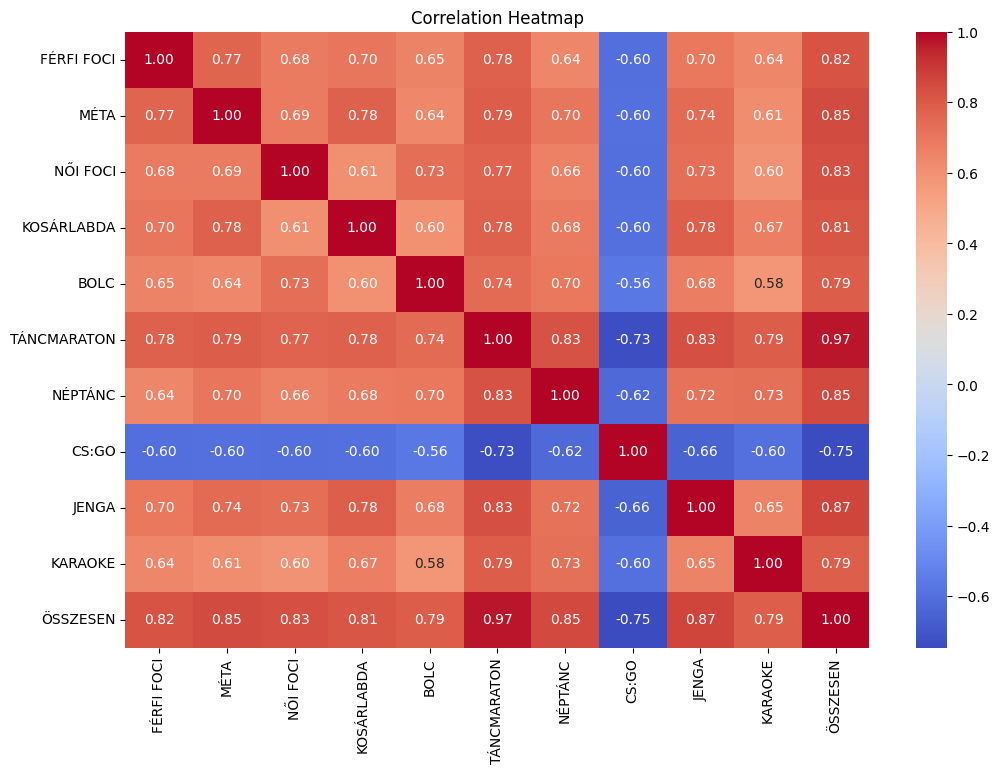

In [160]:
# korrelacio heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_combined[top_features + ['ÖSSZESEN']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# adatelokeszites a js vizualizaciokhoz

In [169]:
import pandas as pd

# Convert all scores to numeric, filling NaNs with 0
for column in df_2022_t.columns:
    if column != 'CSAPATNÉV':
        df_2022_t[column] = pd.to_numeric(df_2022_t[column], errors='coerce').fillna(0)
for column in df_2023_t.columns:
    if column != 'CSAPATNÉV':
        df_2023_t[column] = pd.to_numeric(df_2023_t[column], errors='coerce').fillna(0)
for column in df_2024.columns:
    if column != 'CSAPATNÉV':
        df_2024[column] = pd.to_numeric(df_2024[column], errors='coerce').fillna(0)

# Concatenate the DataFrames
df_combined = pd.concat([df_2022_t, df_2023_t, df_2024], ignore_index=True, sort=False)

# Display the combined dataframe
df_combined.head()

,CSAPATNÉV,Asztalitenisz,Beer-Pong,Bemutatkozó,Biliárd,Bogrács,Bolc,Chandelier,Chest-Pong,City Tour,...,PC:LOL,PÓKER,RÖPI,SAKK,SLAM,STAFÉTA,SZEMÉTSZEDÉS,TÁBLÉ,TÁNCMARATON,ÚSZÁS
0,Zsákmány,25.0,90.0,128.0,20.0,106.0,155.0,60.0,50.0,247.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WhatsOn,50.0,170.0,120.0,30.0,85.0,46.0,70.0,90.0,147.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WeSithek,50.0,50.0,75.0,30.0,90.0,75.0,180.0,130.0,153.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Weedrák,25.0,50.0,225.0,100.0,93.0,44.0,50.0,50.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WaTtaFák,75.0,90.0,208.0,20.0,98.0,40.0,30.0,50.0,246.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Parhuzamos Kordinatak csapat teljesitmenyre

In [193]:
import plotly.express as px
top_5_teams = df_combined.nlargest(100, 'ÖSSZESEN')
fig = px.parallel_coordinates(top_5_teams, dimensions=['FÉRFI FOCI', 'MÉTA', 'NŐI FOCI', 'KOSÁRLABDA', 'ÖSSZESEN'],
                              color='ÖSSZESEN', title='Parhuzamos Kordinatak csapat teljesitmenyre')
fig.show()